# Generate template for PELE's side chain perturbation
This example shows how to generate a template with `peleffy` for `PELE`'s `side chain perturbation` workflow.

In [1]:
from peleffy.topology import Molecule, Topology, RotamerLibrary
from peleffy.forcefield import OpenForceField, OPLS2005ForceField
from peleffy.template import Impact
from peleffy.utils import get_data_file_path

## Exclude terminal rotamers

In [2]:
ligand_path = get_data_file_path('ligands/modified_sidechain.pdb')
molecule = Molecule(ligand_path, tag='GRW',
                    core_constraints=[' CA ', ' C  ', ' N  '],
                    exclude_terminal_rotamers=True)

 - Initializing molecule from PDB
   - Loading molecule from RDKit
   - Assigning stereochemistry from 3D coordinates
   - Setting molecule name to 'modified_sidechain'
   - Representing molecule with the Open Force Field Toolkit


 - Generating rotamer library
   - Core forced to contain atoms: CA, C, N


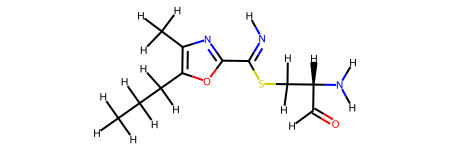

In [3]:
display(molecule)

In [4]:
rotamer_library = RotamerLibrary(molecule)

In [5]:
rotamer_library.to_file(molecule.tag.upper() + '.rot.assign')

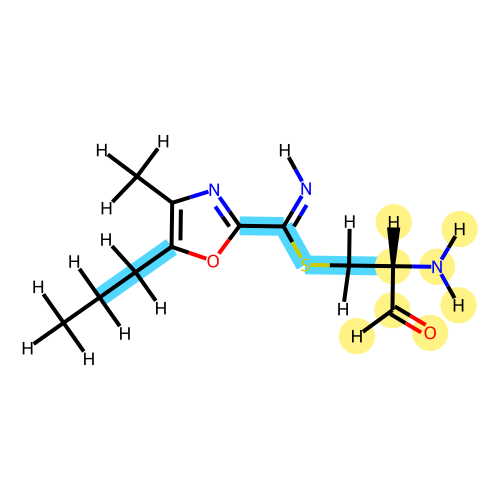

In [6]:
display(rotamer_library)

In [7]:
openff = OpenForceField('openff_unconstrained-1.2.1.offxml')

In [8]:
parameters = openff.parameterize(molecule)

In [9]:
topology = Topology(molecule, parameters)

In [10]:
impact_template = Impact(topology)

In [11]:
impact_template.to_file(molecule.tag.lower() + 'z')

## Include terminal rotamers

In [12]:
ligand_path = get_data_file_path('ligands/modified_sidechain.pdb')
molecule = Molecule(ligand_path, tag='GRW',
                    core_constraints=[' CA ', ' C  ', ' N  '],
                    exclude_terminal_rotamers=False)

 - Initializing molecule from PDB
   - Loading molecule from RDKit
   - Assigning stereochemistry from 3D coordinates
   - Setting molecule name to 'modified_sidechain'
   - Representing molecule with the Open Force Field Toolkit
 - Generating rotamer library
   - Core forced to contain atoms: CA, C, N


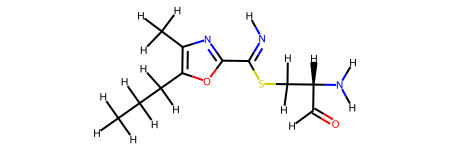

In [13]:
display(molecule)

In [14]:
rotamer_library = RotamerLibrary(molecule)

In [15]:
rotamer_library.to_file(molecule.tag.upper() + '.rot.assign_2')

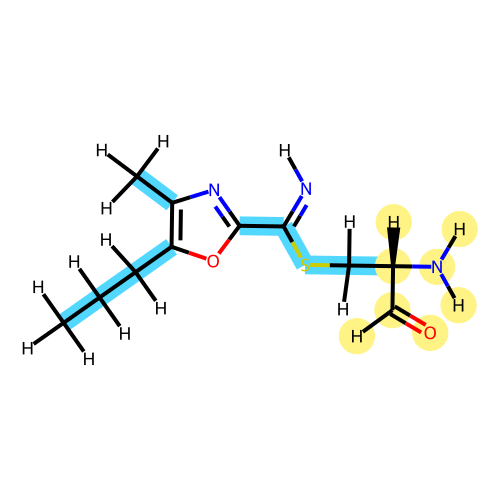

In [16]:
display(rotamer_library)

In [17]:
openff = OpenForceField('openff_unconstrained-1.2.1.offxml')

In [18]:
parameters = openff.parameterize(molecule)

In [19]:
topology = Topology(molecule, parameters)

In [20]:
impact_template = Impact(topology)

In [21]:
impact_template.to_file(molecule.tag.lower() + 'z')

## Parameterize with `OPLS2005`

To indicate the path to the Schrodinger's installation, `peleffy` needs the following environment variable to be set. This is the regular installation path of Schrodinger in `macOS`.

In [22]:
import os
os.environ['SCHRODINGER'] = '/opt/schrodinger/suites2020-2/'

In [23]:
ligand_path = get_data_file_path('ligands/modified_sidechain.pdb')
molecule = Molecule(ligand_path, tag='GRW',
                    core_constraints=[' CA ', ' C  ', ' N  '],
                    exclude_terminal_rotamers=True)

 - Initializing molecule from PDB
   - Loading molecule from RDKit
   - Assigning stereochemistry from 3D coordinates
   - Setting molecule name to 'modified_sidechain'
   - Representing molecule with the Open Force Field Toolkit
 - Generating rotamer library
   - Core forced to contain atoms: CA, C, N


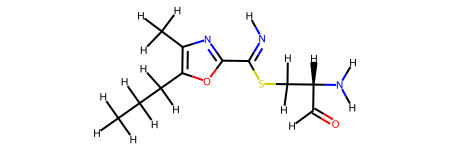

In [24]:
display(molecule)

In [25]:
rotamer_library = RotamerLibrary(molecule)

In [26]:
rotamer_library.to_file(molecule.tag.upper() + '.rot.assign')

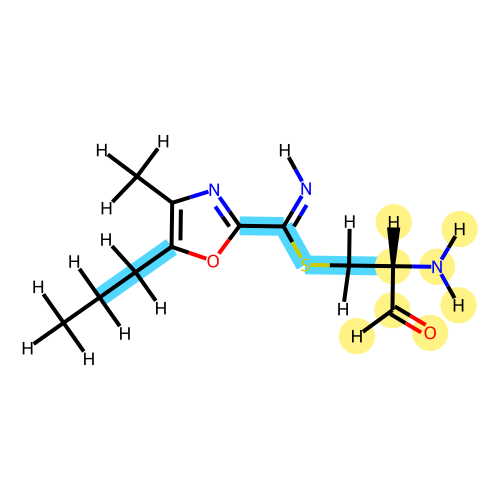

In [27]:
display(rotamer_library)

In [28]:
opls2005 = OPLS2005ForceField()

In [29]:
parameters = opls2005.parameterize(molecule)

In [30]:
topology = Topology(molecule, parameters)

In [31]:
impact_template = Impact(topology)

In [32]:
impact_template.to_file(molecule.tag.lower() + 'z')